In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from panel.interact import interact
from panel import widgets

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
shopify_articles = newsapi.get_everything(
    q = "shopify AND stock",
    language = "en",
    page_size=100,
    sort_by = "relevancy",
    from_param = "2021-01-15",
    to = "2021-01-21"
)
# Print total articles
print(f"Total articles about Shopify: {shopify_articles['totalResults']}")

# Show sample article
shopify_articles["articles"][2]

Total articles about Shopify: 50


{'source': {'id': None, 'name': 'Motley Fool'},
 'author': 'newsfeedback@fool.com (Leo Sun)',
 'title': 'Better Buy: Shopify vs. Amazon',
 'description': 'Which e-commerce juggernaut is the better investment for 2021?',
 'url': 'https://www.fool.com/investing/2021/01/20/better-buy-shopify-vs-amazon/',
 'urlToImage': 'https://g.foolcdn.com/editorial/images/608800/gettyimages-1193265314.jpg',
 'publishedAt': '2021-01-20T13:00:00Z',
 'content': 'Last February, I compared Shopify(NYSE:SHOP) to Amazon(NASDAQ:AMZN). I claimed Amazon\'s stable e-commerce and cloud businesses made it a safer investment, and that Shopify\'s stock was "too hot to han… [+5204 chars]'}

In [7]:
RBC_articles = newsapi.get_everything(
    q = "RBC AND stock",
    language = "en",
    page_size=100,
    sort_by = "relevancy",
    from_param = "2021-01-15",
    to = "2021-01-22"
)
# Print total articles
print(f"Total articles about RBC: {RBC_articles['totalResults']}")

# Show sample article
RBC_articles["articles"][3]

Total articles about RBC: 72


{'source': {'id': None, 'name': 'Motley Fool'},
 'author': 'newsfeedback@fool.com (Harsh Chauhan)',
 'title': 'Forget Bitcoin, This Hot Tech Stock Is a Better Buy',
 'description': "There's a safer way to profit from the cryptocurrency craze.",
 'url': 'https://www.fool.com/investing/2021/01/20/forget-bitcoin-this-hot-tech-stock-is-a-better-buy/',
 'urlToImage': 'https://g.foolcdn.com/editorial/images/608756/light-map.jpg',
 'publishedAt': '2021-01-20T16:05:00Z',
 'content': 'Bitcoin prices have enjoyed meteoric growth over the past few months as institutional investors and big firms have poured money into the digital currency, but the volatility of the cryptocurrency mar… [+3402 chars]'}

In [8]:
enbridge_articles = newsapi.get_everything(
    q = "Enbridge AND stock",
    language = "en",
    page_size=50,
    sort_by = "relevancy",
    from_param = "2021-01-15",
    to = "2021-01-22"
)
# Print total articles
print(f"Total articles about Enbridge: {enbridge_articles['totalResults']}")

# Show sample article
enbridge_articles["articles"][0]

Total articles about Enbridge: 32


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Nia Williams, Rod Nickel',
 'title': 'TC Energy shares fall on fears of KXL oil pipeline cancellation - Reuters',
 'description': 'Shares in Keystone XL oil pipeline owner TC Energy fell on Monday after reports U.S. President-elect Joe Biden will cancel a permit for the long-delayed project, a blow to the Canadian energy sector and Prime Minister Justin Trudeau.',
 'url': 'https://www.reuters.com/article/us-usa-biden-keystone/tc-energy-shares-fall-on-fears-of-kxl-oil-pipeline-cancellation-idUSKBN29N1MQ',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20210118&t=2&i=1548214793&r=LYNXMPEH0H0ZX&w=800',
 'publishedAt': '2021-01-18T16:34:00Z',
 'content': "FILE PHOTO: A depot used to store pipes for Transcanada Corp's planned Keystone XL oil pipeline is seen in Gascoyne, North Dakota, January 25, 2017. REUTERS/Terray Sylvester/\r\nCALGARY, Alberta (Reute… [+1890 chars]"}

In [9]:
barrick_articles = newsapi.get_everything(
    q = "Barrick OR ABX",
    language = "en",
    page_size=50,
    sort_by = "relevancy",
    from_param = "2021-01-15",
    to = "2021-01-22"
)
# Print total articles
print(f"Total articles about Barrick Gold: {barrick_articles['totalResults']}")

# Show sample article
barrick_articles["articles"][0]

Total articles about Barrick Gold: 19


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Nuzulack Dausen',
 'title': 'Tanzania and Kabanga Nickel strike deal to develop nickel project - Reuters',
 'description': 'Tanzania and UK-based mining firm Kabanga Nickel Limited signed a framework agreement on Tuesday to jointly develop the Kabanga nickel project formerly owned by Barrick Gold and Glencore.',
 'url': 'https://www.reuters.com/article/us-tanzania-mining-nickel/tanzania-and-kabanga-nickel-strike-deal-to-develop-nickel-project-idUSKBN29O1PD',
 'urlToImage': 'https://s1.reutersmedia.net/resources_v2/images/rcom-default.png?w=800',
 'publishedAt': '2021-01-19T14:36:00Z',
 'content': 'DAR ES SALAAM (Reuters) - Tanzania and UK-based mining firm Kabanga Nickel Limited signed a framework agreement on Tuesday to jointly develop the Kabanga nickel project formerly owned by Barrick Gold… [+1416 chars]'}

In [10]:
shopify_sentiments = []

for article in shopify_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        shopify_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
shopify_df = pd.DataFrame(shopify_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive"]
shopify_df = shopify_df[cols]

shopify_df.head()

,date,compound,negative,neutral,positive
0,2021-01-15,0.7964,0.000,0.760,0.240
1,2021-01-19,0.1280,0.056,0.849,0.095
2,2021-01-20,0.6124,0.000,0.839,0.161
3,2021-01-20,0.0000,0.000,1.000,0.000
4,2021-01-21,0.0000,0.000,1.000,0.000


In [11]:
shopify_plot = shopify_df.hvplot.bar(x='index', y=['negative', 'positive'], stacked=True, alpha=0.4, rot =90, title="Shopify")
shopify_plot 

:Bars   [index,Variable]   (value)

In [12]:
sum_df= shopify_df.sum(axis=0)
combined= pd.DataFrame(sum_df).rename(columns = {0:"Total"}) 
combined=combined.drop(['date','compound','neutral'])
combined

,Total
negative,1.832
positive,3.974


<AxesSubplot:title={'center':'Shopify'}, ylabel='Total'>

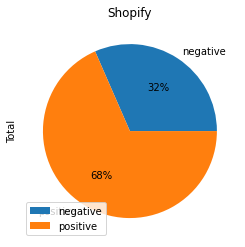

In [13]:
combined_plot = combined.plot.pie(y="Total", title="Shopify", autopct='%.0f%%')
combined_plot 

In [15]:
RBC_sentiments = []

for article in RBC_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        RBC_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
RBC_df = pd.DataFrame(RBC_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive"]
RBC_df = RBC_df[cols]

RBC_df.head()

,date,compound,negative,neutral,positive
0,2021-01-18,0.0000,0.0,1.000,0.000
1,2021-01-22,0.0000,0.0,1.000,0.000
2,2021-01-22,0.0000,0.0,1.000,0.000
3,2021-01-20,0.4497,0.0,0.887,0.113
4,2021-01-16,0.1027,0.0,0.955,0.045


In [16]:
RBC_plot = RBC_df.hvplot.bar(x='index', y=['negative', 'positive'], stacked=True, alpha=0.4, rot =90, title="RBC")
RBC_plot

:Bars   [index,Variable]   (value)

In [17]:
sum1_df= RBC_df.sum(axis=0)
combined1= pd.DataFrame(sum1_df).rename(columns = {0:"Total"}) 
combined1=combined1.drop(['date','compound','neutral'])
combined1

,Total
negative,3.637
positive,4.294


<AxesSubplot:title={'center':'RBC'}, ylabel='Total'>

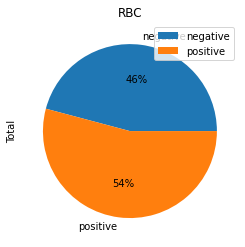

In [18]:
combined1_plot = combined1.plot.pie(y="Total", title="RBC", autopct='%.0f%%')
combined1_plot

In [19]:
enbridge_sentiments = []

for article in enbridge_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        enbridge_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
enbridge_df = pd.DataFrame(enbridge_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive"]
enbridge_df = enbridge_df[cols]

enbridge_df.head()

,date,compound,negative,neutral,positive
0,2021-01-18,0.0000,0.000,1.000,0.000
1,2021-01-20,0.5994,0.082,0.706,0.212
2,2021-01-19,-0.1280,0.095,0.852,0.053
3,2021-01-19,-0.1280,0.095,0.852,0.053
4,2021-01-19,-0.1280,0.095,0.852,0.053


In [20]:
enbridge_plot = enbridge_df.hvplot.bar(x='index', y=['negative', 'positive'], stacked=True, alpha=0.4, rot =90, title="Enbridge")
enbridge_plot

:Bars   [index,Variable]   (value)

In [21]:
sum2_df= enbridge_df.sum(axis=0)
combined2= pd.DataFrame(sum2_df).rename(columns = {0:"Total"}) 
combined2=combined2.drop(['date','compound','neutral'])
combined2

,Total
negative,1.797
positive,2.316


<AxesSubplot:title={'center':'Enbridge'}, ylabel='Total'>

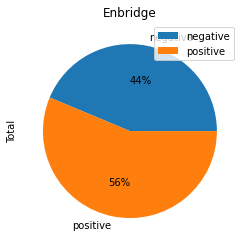

In [22]:
combined2_plot = combined2.plot.pie(y="Total", title="Enbridge", autopct='%.0f%%')
combined2_plot 

In [23]:
barrick_sentiments = []

for article in barrick_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        barrick_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
barrick_df = pd.DataFrame(barrick_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive"]
barrick_df = barrick_df[cols]

barrick_df.head()

,date,compound,negative,neutral,positive
0,2021-01-19,0.3182,0.056,0.850,0.094
1,2021-01-22,-0.7003,0.171,0.829,0.000
2,2021-01-19,0.5859,0.000,0.858,0.142
3,2021-01-16,0.1531,0.093,0.825,0.082
4,2021-01-19,0.5473,0.000,0.898,0.102


In [24]:
barrick_plot = barrick_df.hvplot.bar(x='index',y=['negative', 'positive'], stacked=True, alpha=0.4, rot =90, title="Barrick")
barrick_plot

:Bars   [index,Variable]   (value)

In [25]:
sum3_df= barrick_df.sum(axis=0)
combined3= pd.DataFrame(sum3_df).rename(columns = {0:"Total"}) 
combined3=combined3.drop(['date','compound','neutral'])
combined3

,Total
negative,0.429
positive,1.191


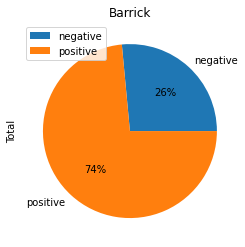

In [26]:
combined3_plot = combined3.plot.pie(y="Total", title="Barrick", autopct='%.0f%%')